In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
bank=pd.read_csv('bank-full.csv',sep =';' )
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
bank.shape

(45211, 17)

In [ ]:
bank[categorical].isnull().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
y            0
dtype: int64

###Factorization

In [ ]:
bank[['job','marital','education','default','housing','loan','contact','month','poutcome','y']]=bank[['job','marital','education','default','housing','loan','contact','month','poutcome','y']].apply(lambda x: pd.factorize(x)[0])
bank               #converting into dummy variables

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,0,0,0,5,0,261,1,-1,0,0,0
1,44,1,1,1,0,29,0,0,0,5,0,151,1,-1,0,0,0
2,33,2,0,1,0,2,0,1,0,5,0,76,1,-1,0,0,0
3,47,3,0,2,0,1506,0,0,0,5,0,92,1,-1,0,0,0
4,33,4,1,2,0,1,1,0,0,5,0,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,5,977,3,-1,0,0,1
45207,71,5,2,3,0,1729,1,0,1,17,5,456,2,-1,0,0,1
45208,72,5,0,1,0,5715,1,0,1,17,5,1127,5,184,3,3,1
45209,57,3,0,1,0,668,1,0,2,17,5,508,4,-1,0,0,0


In [ ]:
X = bank.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
Y = bank.iloc[:,16]
classifier = LogisticRegression()
classifier.fit(X,Y) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
classifier.coef_  # coefficients of features   

array([[-4.52106061e-02, -7.16403154e-02, -3.88013669e-02,
        -1.29268039e-01, -5.99070179e-03,  1.70820714e-05,
         1.27132748e-01, -6.68385465e-02,  3.04463231e-02,
        -3.15922982e-02,  6.15133329e-02,  3.35627030e-03,
        -3.14233854e-01, -5.46496269e-04,  1.09654730e-01,
         2.49877073e-01]])

In [ ]:
classifier.predict_proba (X) # Probability values   

array([[0.90842812, 0.09157188],
       [0.90942662, 0.09057338],
       [0.89671041, 0.10328959],
       ...,
       [0.65494921, 0.34505079],
       [0.93188324, 0.06811676],
       [0.47339361, 0.52660639]])

# Prediction

In [ ]:
y_pred = classifier.predict(X)
bank["y_pred"] = y_pred
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred
0,58,0,0,0,0,2143,0,0,0,5,0,261,1,-1,0,0,0,0
1,44,1,1,1,0,29,0,0,0,5,0,151,1,-1,0,0,0,0
2,33,2,0,1,0,2,0,1,0,5,0,76,1,-1,0,0,0,0
3,47,3,0,2,0,1506,0,0,0,5,0,92,1,-1,0,0,0,0
4,33,4,1,2,0,1,1,0,0,5,0,198,1,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,5,977,3,-1,0,0,1,0
45207,71,5,2,3,0,1729,1,0,1,17,5,456,2,-1,0,0,1,0
45208,72,5,0,1,0,5715,1,0,1,17,5,1127,5,184,3,3,1,0
45209,57,3,0,1,0,668,1,0,2,17,5,508,4,-1,0,0,0,0


In [ ]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([bank,y_prob],axis=1)
new_df  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred,0,1
0,58,0,0,0,0,2143,0,0,0,5,0,261,1,-1,0,0,0,0,0.908428,0.091572
1,44,1,1,1,0,29,0,0,0,5,0,151,1,-1,0,0,0,0,0.909427,0.090573
2,33,2,0,1,0,2,0,1,0,5,0,76,1,-1,0,0,0,0,0.896710,0.103290
3,47,3,0,2,0,1506,0,0,0,5,0,92,1,-1,0,0,0,0,0.945258,0.054742
4,33,4,1,2,0,1,1,0,0,5,0,198,1,-1,0,0,0,0,0.866357,0.133643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,5,977,3,-1,0,0,1,0,0.552706,0.447294
45207,71,5,2,3,0,1729,1,0,1,17,5,456,2,-1,0,0,1,0,0.963971,0.036029
45208,72,5,0,1,0,5715,1,0,1,17,5,1127,5,184,3,3,1,0,0.654949,0.345051
45209,57,3,0,1,0,668,1,0,2,17,5,508,4,-1,0,0,0,0,0.931883,0.068117


##confusion matrix

In [ ]:
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix) 

[[39120   802]
 [ 4249  1040]]


In [ ]:
pd.crosstab(y_pred,Y)  

y,0,1
row_0,,
0,39120,4249
1,802,1040


In [ ]:
#type(y_pred)
accuracy = sum(Y==y_pred)/bank.shape[0]
accuracy

0.8882794010307226

In [ ]:
print (classification_report (Y, y_pred))  

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.20      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.59      0.62     45211
weighted avg       0.86      0.89      0.86     45211



In [ ]:
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score                                   # logistic ROC score 

0.5882726752978481

###ROC_Curve

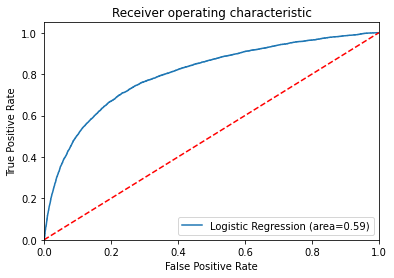

In [ ]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])                 
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')    
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()                                                      #fpr, tpr, thresholds = precision-recall_curve(Y,classifier.predict_proba(X)[:,1]) 

In [ ]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1]) 
y_prob1                              

,0
0,0.091572
1,0.090573
2,0.103290
3,0.054742
4,0.133643
...,...
45206,0.447294
45207,0.036029
45208,0.345051
45209,0.068117
